# Data Mining - assignment #1
## First Approach: FP-Growth Algorithm

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import fpgrowth,  association_rules
import matplotlib.pyplot as plt

### Read true.csv file and label it with 1

In [15]:
true_df = pd.read_csv(r"True.csv", sep=',')
true_df['label'] = 1
true_df.sample(5)

,title,text,subject,date,label
12487,Botswana court orders government to recognize ...,GABORONE (Reuters) - A transgender woman has w...,worldnews,"December 12, 2017",1
10487,"Cruz, Trump split four states in setback for R...",WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 5, 2016",1
7180,Merkel: Didn't discuss sanctions on Russia ove...,BERLIN (Reuters) - German Chancellor Angela Me...,politicsNews,"November 18, 2016",1
6880,U.S. aerospace industry urges Trump to help Ex...,WASHINGTON (Reuters) - The chief executive of ...,politicsNews,"December 6, 2016",1
15200,British official urges social media companies ...,WASHINGTON (Reuters) - Britain s top internal ...,worldnews,"November 10, 2017",1


### Read fake.csv file and label it with 0

In [16]:
fake_df = pd.read_csv(r"Fake.csv", sep=',') 
fake_df['label'] = 0
fake_df.sample(5)

,title,text,subject,date,label
10714,“Comedian” Kathy Griffin’s 7th And FINAL Venue...,"Venues in New Jersey, New York and Pennsylvani...",politics,"Jun 3, 2017",0
10068,WATCH MAGA RALLY LIVE: President Trump Holds M...,PRESIDENT TRUMP IN PHOENIX SPEAKING TO HIS SUP...,politics,"Aug 22, 2017",0
8284,Watch The EXACT Moment Marco Rubio Saw His Pr...,Marco Rubio might have been flying high after ...,News,"February 7, 2016",0
17836,BREAKING: DISGUSTING AUDIO IS RELEASED Of Harv...,"The disgraced anti-Trump Hollywood producer, b...",left-news,"Oct 10, 2017",0
21726,IF YOU CROSS OUR BORDERS ILLEGALLY….YOU CAN NO...,We re going to have people who are bilingual ...,left-news,"May 18, 2015",0


### Combine true and fake news in one dataframe

In [17]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
31306,WOW! HUNGARY’S PRIME MINISTER Follows Through ...,Hungary has slashed illegal immigration by ove...,politics,"Sep 16, 2017",0
24197,CEO Of Starbucks Sends Giant F**K YOU To Trum...,In what can only be seen as a groundbreaking a...,News,"January 29, 2017",0
34731,THE YOUNG GIRL THE CLINTONS DESTROYED…Monica L...,"In 1998, I lost my reputation and my dignity....",politics,"Aug 8, 2016",0
924,Trump says current Fed chair Yellen is 'excell...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 1, 2017",1
39236,LOL! HILLARY Commends Weinstein Accusers For C...,Hillary Clinton today falsely called Donald Tr...,left-news,"Oct 13, 2017",0
17383,Thai hotels booked up ahead of funeral of reve...,BANGKOK (Reuters) - Hotels in Bangkok s bustli...,worldnews,"October 16, 2017",1
25665,BOMBSHELL: Trump Called ‘The Apprentice’ Soun...,A microphone guy who worked on The Apprentice ...,News,"October 11, 2016",0
30483,"How The Left, The Anti Defamation League and M...",Immediately after the police identified the su...,politics,17-Feb-18,0
34890,BAM! THREE THINGS UFC’s Dana White Respects Ab...,"Dana White, Ultimate Fighting Championship Pre...",politics,"Jul 20, 2016",0
9629,Trump picks NJ Governor Christie to head trans...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"May 9, 2016",1


### Produce a Frequency-Term Table out of the datafarame

In [18]:
vectorizer = CountVectorizer(stop_words='english',binary=True,max_features=1000)
matrix = vectorizer.fit_transform(all_news_df['title']+' '+all_news_df['text'])

In [21]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(10)

,000,10,100,11,12,13,14,15,16,17,...,worst,wouldn,wrong,wrote,year,years,yes,york,young,youtube
28014,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36810,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35916,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19608,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
34388,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6857,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9450,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
31014,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
14698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
13349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Produce Frequent Itemsets

In [22]:
freq_items = fpgrowth(sparse_df, min_support=0.1, use_colnames=True)
freq_items

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.732460,(said)
1,0.528932,(president)
2,0.504855,(trump)
3,0.483006,(reuters)
4,0.431690,(people)
...,...,...
1135,0.108245,"(featured, image, donald)"
1136,0.108023,"(featured, image, trump, donald)"
1137,0.106063,"(featured, said, image)"
1138,0.100851,"(featured, like, image)"


### List the top 20 popular words

In [23]:

freq_words = freq_items[freq_items["itemsets"].apply(len) == 1]
frequent_words_sorted = freq_words.sort_values(by='support', ascending=False)
top_20 = frequent_words_sorted.head(20)
top_20

,support,itemsets
0,0.732460,(said)
1,0.528932,(president)
2,0.504855,(trump)
3,0.483006,(reuters)
4,0.431690,(people)
5,0.412446,(donald)
87,0.360573,(new)
117,0.343601,(just)
6,0.337922,(told)
146,0.321195,(state)


### Bar plot visualization of the 20 top popular words

C:\Users\ibrahima\AppData\Local\Temp\ipykernel_6064\4011254877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))


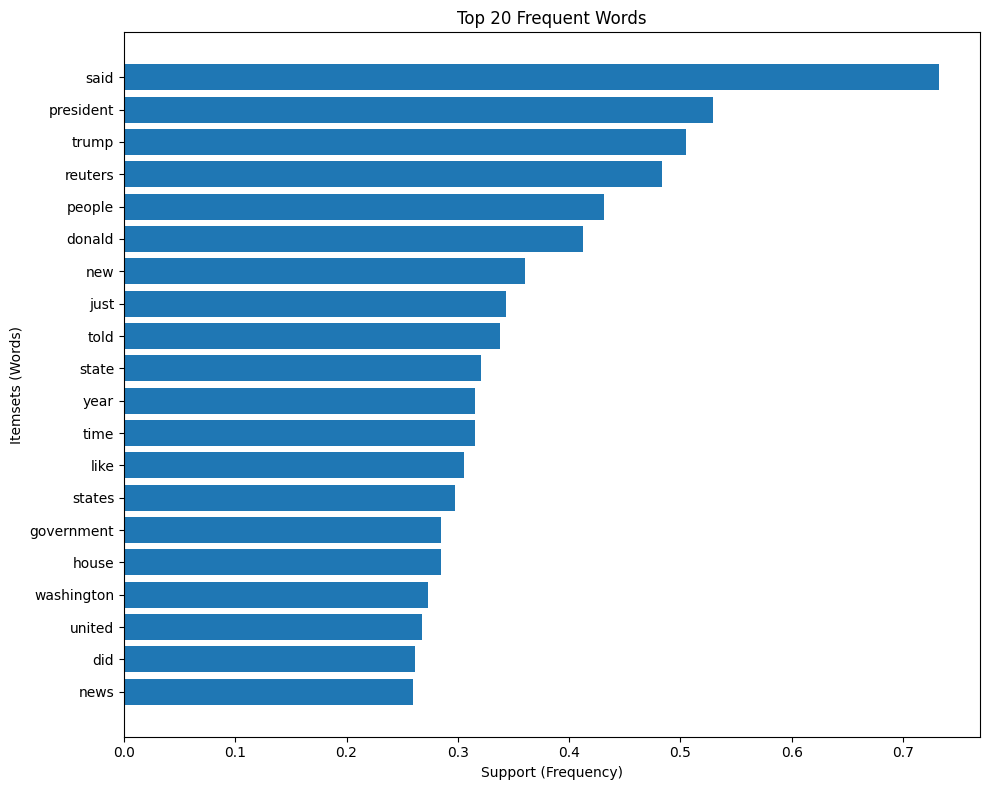

In [24]:
top_20['itemsets_str'] = top_20['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.figure(figsize=(10, 8))
plt.barh(top_20['itemsets_str'], top_20['support'])
plt.xlabel('Support (Frequency)')
plt.ylabel('Itemsets (Words)')
plt.title('Top 20 Frequent Words')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Generate association rules out of the frequent Itemsets

In [29]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.9)
print(f"{len(rules)} rules generated.")
rules_sorted = rules.sort_values(by='lift', ascending=False)
rules_sorted.head(20)

324 rules generated.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
320,"(featured, donald)","(image, trump)",0.113747,0.145641,0.108023,0.949677,6.520660,1.0,0.091456,16.977472,0.955304,0.713655,0.941098,0.845690
276,"(said, hillary)",(clinton),0.114549,0.168382,0.106842,0.932724,5.539345,1.0,0.087554,12.361310,0.925486,0.606754,0.919102,0.783624
277,"(said, clinton)",(hillary),0.116843,0.173593,0.106842,0.914411,5.267542,1.0,0.086559,9.655520,0.917343,0.581948,0.896432,0.764942
275,"(trump, clinton)",(hillary),0.122745,0.173593,0.110918,0.903647,5.205537,1.0,0.089610,8.576886,0.920937,0.598198,0.883408,0.771300
159,"(said, united, donald, president)","(trump, states)",0.111609,0.182146,0.105127,0.941928,5.171273,1.0,0.084798,14.083386,0.907960,0.557327,0.928994,0.759543
149,"(said, united, donald)","(trump, states)",0.123769,0.182146,0.116575,0.941875,5.170984,1.0,0.094031,14.070630,0.920549,0.615692,0.928930,0.790942
141,"(united, donald, president)","(trump, states)",0.126709,0.182146,0.119048,0.939532,5.158123,1.0,0.095968,13.525495,0.923096,0.627200,0.926066,0.796558
134,"(united, donald)","(trump, states)",0.143570,0.182146,0.134616,0.937636,5.147710,1.0,0.108466,13.114143,0.940811,0.704429,0.923746,0.838346
250,(barack),"(obama, president)",0.119137,0.184730,0.110562,0.928024,5.023682,1.0,0.088554,11.326961,0.909270,0.571955,0.911715,0.763264
323,"(featured, just)",(image),0.124282,0.207403,0.118847,0.956272,4.610687,1.0,0.093071,18.125774,0.894252,0.558393,0.944830,0.764648


### Scatterplot of the rules was generated (between support and confidence)

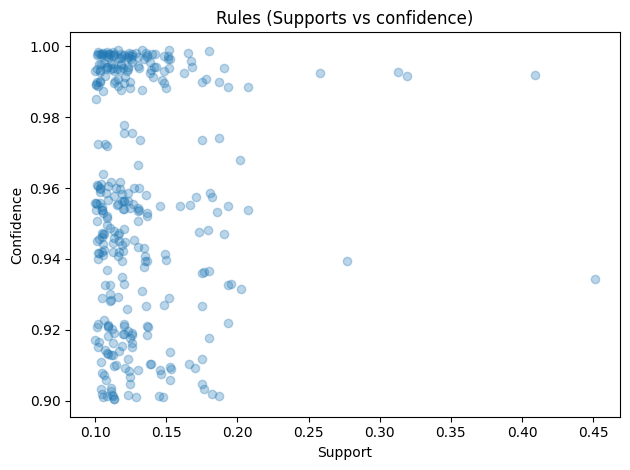

In [30]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.3)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Rules (Supports vs confidence)')
plt.gca()
plt.tight_layout()

In [31]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(reuters),(said),0.483006,0.732460,0.451245,0.934243,1.275487,1.0,0.097462,4.068631,0.417772,0.590464,0.754217,0.775155
1,"(reuters, president)",(said),0.295069,0.732460,0.277184,0.939387,1.282509,1.0,0.061058,4.413906,0.312482,0.369408,0.773443,0.658908
2,"(reuters, trump)",(said),0.217404,0.732460,0.202526,0.931564,1.271829,1.0,0.043286,3.909365,0.273105,0.270996,0.744204,0.604033
3,"(reuters, trump, president)",(said),0.191879,0.732460,0.179718,0.936622,1.278734,1.0,0.039174,4.221346,0.269733,0.241356,0.763109,0.590992
4,"(reuters, people)",(said),0.178137,0.732460,0.170542,0.957364,1.307053,1.0,0.040064,6.275023,0.285839,0.230445,0.840638,0.595099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,"(featured, trump, donald)",(image),0.113457,0.207403,0.108023,0.952101,4.590572,1.0,0.084491,16.547077,0.882261,0.507535,0.939566,0.736467
320,"(featured, donald)","(image, trump)",0.113747,0.145641,0.108023,0.949677,6.520660,1.0,0.091456,16.977472,0.955304,0.713655,0.941098,0.845690
321,"(featured, said)",(image),0.112522,0.207403,0.106063,0.942597,4.544751,1.0,0.082725,13.807579,0.878856,0.495938,0.927576,0.726990
322,"(featured, like)",(image),0.105528,0.207403,0.100851,0.955678,4.607819,1.0,0.078964,17.882488,0.875352,0.475530,0.944079,0.720966


## Analyze the association rules based on top words of fake and true news:
- Since the generated association rules of the FP-Growth algorithm was the same as the rules generated through Apriori algorithm, then we will select the same set of rules that we selected when we used Apriori algorithm. Please refer to apriori-approach file for more details.  

## Summary

* Some of the words at the antecedent and consequent of these rules are belonging to both the popular words of Fake and Real News.  for example the word "said". Also The words are part of multiple news subjects like "featured" in (news) subject, and "president, minister" in (politics/middle-east) subjects".

* Some recommendations based on the discovered rule that might help understanding and identifying fake news from true news:
    * The news record that satisfy one of the following rules, there would be a good chance to be true news:
        - (reuters)	--> (said)
        - (minister) --> (said)  or	 (minister, reuters) --> (said)
        - (reuters, government) --> (said)
        - (washington, house, reuters) --> (said)
        - (republican, trump, reuters) --> (donald, said)
    * The news record that contains that satisfy this rule (featured --> image) or in other words contains the frequent set (feature,image), there would be a good chance to be fake news. 